In [5]:
import numpy as np
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

#### Load sample image 

In [6]:
dataset = load_sample_images()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Program Files\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [13]:
print(dataset.DESCR)

Image: china.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/danielbuechele/
[3] http://www.flickr.com/photos/danielbuechele/6061409035/sizes/z/in/photostream/


Image: flower.jpg
Released under a creative commons license. [1]
Attribution: Some rights reserved by danielbuechele [2]
Retrieved 21st August, 2011 from [3] by Robert Layton

[1] http://creativecommons.org/licenses/by/2.0/
[2] http://www.flickr.com/photos/vultilion/
[3] http://www.flickr.com/photos/vultilion/6056698931/sizes/z/in/photostream/






In [7]:
china = dataset.images[0]
flower = dataset.images[1]
print('[Shape] \n china img : {0} \n flower img : {1}'.format(china.shape, flower.shape))

[Shape] 
 china img : (427, 640, 3) 
 flower img : (427, 640, 3)


In [8]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape
print(dataset.shape) 

(2, 427, 640, 3)


#### Make 2 filter
- horizontal
- vertical

In [9]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

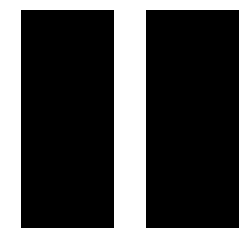

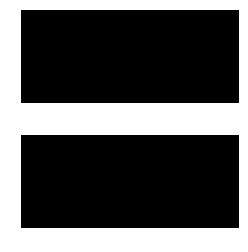

In [10]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical
filters[3, :, :, 1] = 1 # horizontal
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

#### input image data 와 filter를 적용한 합성곱층의 그래프 

In [9]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

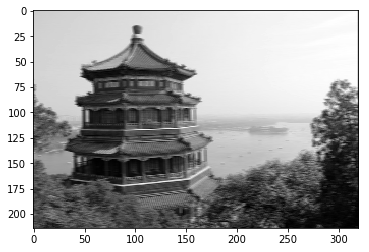

In [10]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})
# Apply horizontal filter to china.jpg 
plt.imshow(output[0, :, :, 1], cmap='gray')
plt.show()

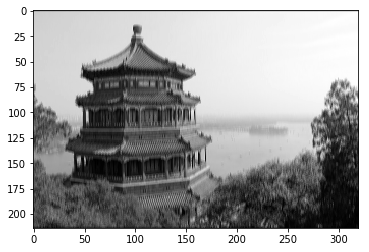

In [11]:
# Apply vertical filter to china.jpg 
plt.imshow(output[0, :, :, 0], cmap='gray')
plt.show()

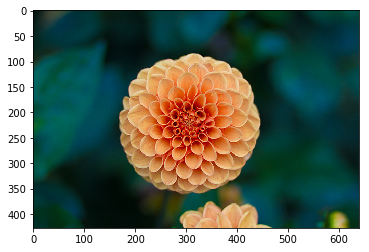

In [22]:
plt.imshow(flower ,cmap="gray")

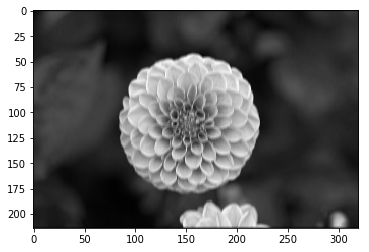

In [12]:
# Apply vertical filter to flower.jpg 
plt.imshow(output[1, :, :, 0], cmap='gray')
plt.show()

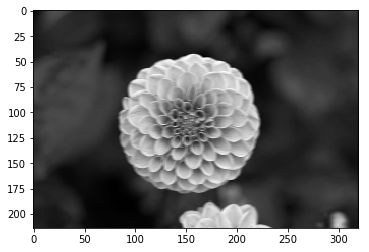

In [13]:
# Apply horizontal filter to flower.jpg 
plt.imshow(output[1, :, :, 1], cmap='gray')
plt.show()

#### More detail 

In [11]:
reset_graph()
X_detail  = tf.placeholder(tf.float32, shape=(None, height, width, 1)) # channel =1
feature_maps = tf.constant(filters)
convolution = tf.nn.conv2d(X_detail, feature_maps, strides=[1,1,1,1], padding='SAME')

ValueError: Dimensions must be equal, but are 1 and 3 for 'Conv2D' (op: 'Conv2D') with input shapes: [?,427,640,1], [7,7,3,2].

In [15]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2],padding="SAME")

In [13]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

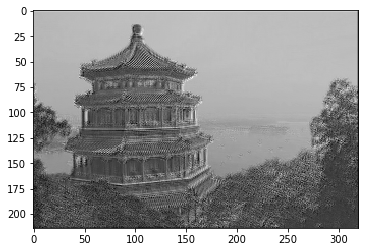

In [14]:
# china, horizontal filter 
plt.imshow(output[0, :, :, 1], cmap="gray") # 첫 번째 이미지의 두 번째 특성맵 그리기
plt.show()

### VALID VS SAME 
- VALID : without padding
- SAME: with padding

In [17]:
reset_graph()

filter_primes = np.array([2., 3., 5., 6., 11., 13.], dtype=np.float32)
# arrange (start, stop, dtype)
x = tf.constant(np.arange(1, 13+1, dtype=np.float32).reshape([1,1,13,1]))
filters = tf.constant(filter_primes.reshape(1, 6, 1, 1))

valid_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='VALID')
same_conv = tf.nn.conv2d(x, filters, strides=[1, 1, 5, 1], padding='SAME')

with tf.Session() as sess:
    print('Valid: \n {}'.format(valid_conv.eval()))
    print('Same: \n {}'.format(same_conv.eval()))

Valid: 
 [[[[180.]
   [380.]]]]
Same: 
 [[[[140.]
   [340.]
   [191.]]]]


In [18]:
print("VALID:")
print(np.array([1,2,3,4,5,6]).T.dot(filter_primes))
print(np.array([6,7,8,9,10,11]).T.dot(filter_primes))
print("SAME:")
print(np.array([0,1,2,3,4,5]).T.dot(filter_primes))
print(np.array([5,6,7,8,9,10]).T.dot(filter_primes))
print(np.array([10,11,12,13,0,0]).T.dot(filter_primes))

VALID:
180.0
380.0
SAME:
140.0
340.0
191.0


### Pooling 

In [19]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical
filters[3, :, :, 1] = 1 # horizontal

<function matplotlib.pyplot.show(*args, **kw)>

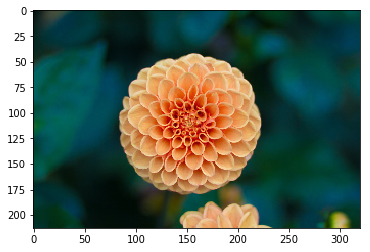

In [20]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[1].astype(np.uint8))
plt.show

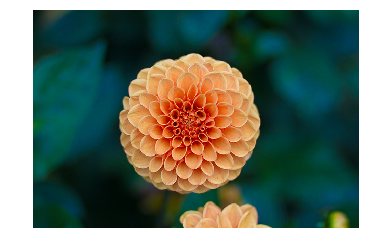

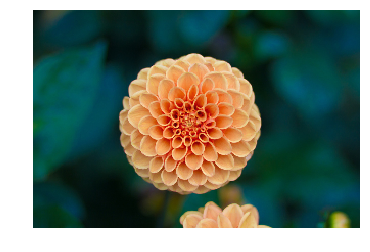

In [23]:
plot_color_image(dataset[1])
plt.show()
    
plot_color_image(output[1])
plt.show()